In [1]:
import numpy as np
np.random.seed(7)
import matplotlib.pyplot as plt

In [2]:
NUM_ITERATIONS = 2000
ALPHA = 0.01
GAMMA = 0.99
STATES = np.arange(7)
UPPER_STATES = np.arange(6)
LOWER_STATE = 6
ACTIONS = (0, 1) # ("dashed", "solid")
# x(s,a) - the first 8 features are for the state, the last for the action
x = np.array(
    [
        [[2, 0, 0, 0, 0, 0, 0, 1, 0], [2, 0, 0, 0, 0, 0, 0, 1, 1]],
        [[0, 2, 0, 0, 0, 0, 0, 1, 0], [0, 2, 0, 0, 0, 0, 0, 1, 1]],
        [[0, 0, 2, 0, 0, 0, 0, 1, 0], [0, 0, 2, 0, 0, 0, 0, 1, 1]],
        [[0, 0, 0, 2, 0, 0, 0, 1, 0], [0, 0, 0, 2, 0, 0, 0, 1, 1]],
        [[0, 0, 0, 0, 2, 0, 0, 1, 0], [0, 0, 0, 0, 2, 0, 0, 1, 1]],
        [[0, 0, 0, 0, 0, 2, 0, 1, 0], [0, 0, 0, 0, 0, 2, 0, 1, 1]],
        [[0, 0, 0, 0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 0, 0, 1, 2, 1]]
    ]
)
w = np.array([1.0, 1, 1, 1, 1, 1, 10, 1, 1])

In [3]:
def take_action(state, action):
    # Validate state and action
    if state not in STATES:
        raise ValueError(f"Invalid state: {state}")
    if action not in ACTIONS:
        raise ValueError(f"Invalid action: {action}")
    
    if action == 0:
        return np.random.choice(UPPER_STATES)
    if action == 1:
        return LOWER_STATE

def select_action_behavior_policy():
    if np.random.rand() < 6/7:
        return 0
    return 1

def q_hat(s, a, w):
    return w.dot(x[s][a])

def max_q_hat(s, w):
    return np.max([q_hat(s, a, w) for a in ACTIONS])

In [4]:
w_history = np.zeros((NUM_ITERATIONS, len(w)))
state = np.random.choice(STATES)
for i in range(NUM_ITERATIONS):
    action = select_action_behavior_policy()
    new_state = take_action(state, action)
    delta = GAMMA * max_q_hat(new_state, w) - q_hat(state, action, w)
    w += ALPHA * delta * x[state][action]
    state = new_state
    w_history[i] = w
print(w)

[ 73.45655927  66.98927412  69.24919803  68.23948208  71.76763501
  71.24826824  -1.95580918 184.56359002  36.82775316]


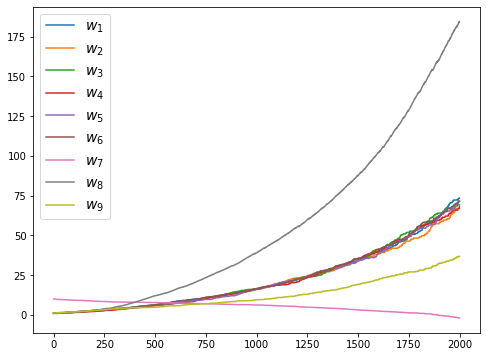

In [8]:
plt.subplots(figsize=(8,6))
for i in range(len(w)):
    plt.plot(np.arange(NUM_ITERATIONS), w_history[:, i], label=f"$w_{i+1}$")
plt.legend(fontsize=14)